# Performance evaluation


This notebook demonstrates how to compute precision and recall using Scikit-Learn.


# Breast cancer dataset
With this dataset, we will be predicting whether a tumor is MALIGNANT or BENIGN based on attributes of the tumor.

Attributes include:
* radius (mean of distances from center to points on the perimeter) 
* texture (standard deviation of gray-scale values) 
* perimeter 
* area 
* smoothness (local variation in radius lengths) 
* compactness (perimeter^2 / area - 1.0) 
* concavity (severity of concave portions of the contour) 
* concave points (number of concave portions of the contour) 
* symmetry 
* fractal dimension ("coastline approximation" - 1)

The dataset is included in Scikit-Learn. 

For details, see: 

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [1]:
from sklearn import datasets

In [2]:
# import dataset
cancer = datasets.load_breast_cancer()

## What are we working with?
What does the data structure look like?

In [3]:
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


What do the feature vectors look like?

In [5]:
print(cancer.data[:5])    # display first 5 feature vectors

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

What are the output classes?

In [6]:
print(cancer.target_names)  # output label names

['malignant' 'benign']


In [7]:
print(cancer.target[:500])   # output values for first 500 tumors 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In this dataset MALIGNANT = 0, BENIGN = 1.

What is the class distribution?

In [8]:
import numpy as np

# count the number of each label
label_counts = np.bincount(cancer.target)
total_counts = cancer.target.shape[0]
for counts, label in zip(label_counts, cancer.target_names):
  print('{0} instances of {1} ({2:.1f}%)'.format(counts, label, 100.0*counts/total_counts))

212 instances of malignant (37.3%)
357 instances of benign (62.7%)


## Split our dataset

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

# Split the data set into training and testing (80% testing, 20% training).
# Use stratified split to make sure class distribution from train/test is the same.
split = StratifiedShuffleSplit(n_splits=1, train_size=0.8, random_state=3)

for train_index, test_index in split.split(cancer.data, cancer.target):
    print('Training samples: {}, testing samples: {}'
          .format(train_index.shape, test_index.shape))
    
X_train = cancer.data[train_index]
X_test = cancer.data[test_index]

y_train = cancer.target[train_index]
y_test = cancer.target[test_index]

Training samples: (455,), testing samples: (114,)


In [10]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

label_counts = np.bincount(y_train)
total_counts = y_train.shape[0]
for counts, label in zip(label_counts, cancer.target_names):
  print('{0} training instances of {1} ({2:.1f}%)'.format(counts, label, 100.0*counts/total_counts))

X_train shape: (455, 30)
y_train shape: (455,)
X_test shape: (114, 30)
y_test shape: (114,)
170 training instances of malignant (37.4%)
285 training instances of benign (62.6%)


# Create the logistic regression model
We will use a logistic regression classifier model. However, we could use other models: knn, decision trees, perceptron.

In [11]:
from sklearn import linear_model

In [12]:
logit_reg = linear_model.LogisticRegression(max_iter=5000)

# Train the model

In [13]:
logit_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

# Evaluate the model

In [14]:
print("Test set score: {:.2f}".format(logit_reg.score(X_test, y_test)))

Test set score: 0.96


# Predicted probabilities
A logistic regression model outputs the class probability. To classify a sample, a threshold is applied to the output. 

- Output greater than 0.5 is labeled positive (e.g. Malignant). 
- Output less than 0.5 is labeled negative (e.g. Benign)

The `predict` function outputs *class labels* (using 0.5 as a threshold), not probabilities. 

The `predict_proba` function outputs *probabilities* for both classes.

If the classification threshold is increased/decrease from 0.5, this may change the recall/precision tradeoff.

In [15]:
lr_pred = logit_reg.predict(X_test)

In [16]:
print(lr_pred[:10])

[0 1 1 1 1 1 1 1 1 0]


In [17]:
lr_pred_prob = logit_reg.predict_proba(X_test)


In [18]:
lr_pred_prob[:5]

array([[9.95677811e-01, 4.32218907e-03],
       [9.47948063e-04, 9.99052052e-01],
       [1.44738879e-04, 9.99855261e-01],
       [5.15829374e-05, 9.99948417e-01],
       [4.99163437e-04, 9.99500837e-01]])

In [19]:
['Malignant prob=%.2f, Benign prob=%.2f' % (lr_pred_prob[i][0], lr_pred_prob[i][1]) for i in range(0,5)]

['Malignant prob=1.00, Benign prob=0.00',
 'Malignant prob=0.00, Benign prob=1.00',
 'Malignant prob=0.00, Benign prob=1.00',
 'Malignant prob=0.00, Benign prob=1.00',
 'Malignant prob=0.00, Benign prob=1.00']

While logistic regression can classify instances based on predicted probability, the implementation of its `decision_function` in Scikit-Learn outputs the *logit* of the probability of the positive class (BENIGN class is the positive class (label=1) in this dataset).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Logit.svg/1280px-Logit.svg.png" width="50%">

By Krishnavedala - Own work, CC0, https://commons.wikimedia.org/w/index.php?curid=21731574

In [20]:
from scipy.special import logit
print(logit(4.20331862e-03))

-5.467668740679456


In [21]:
lr_score = logit_reg.decision_function(X_test)

In [22]:
lr_score[:5]

array([-5.43966172,  6.96026245,  8.84043452,  9.87226803,  7.6020777 ])

# Handling class imbalance
Scikit-Learn provides functions for calculating recall, precision and F1 score

In [23]:
from sklearn.metrics import recall_score, precision_score, f1_score

In [24]:
print('Precision={:.2f}, Recall={:.2f}, F1 score={:.2f}'.format(precision_score(lr_pred, y_test), recall_score(lr_pred, y_test), f1_score(lr_pred, y_test)))

Precision=0.96, Recall=0.97, F1 score=0.97


# Confusion matrices
We can compute *confusion matrices* to visualize how our classifier missclassifies each class. This is especially useful when we have more than 2 classes (i.e. multiclass problem).

`confusion_matrix` will calculate the confusion matrix given true and predicted labels.

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, lr_pred)

In [26]:
print(cm)

[[40  2]
 [ 3 69]]


`plot_confusion_matrix` creates a nice visualization of the confusion matrix.

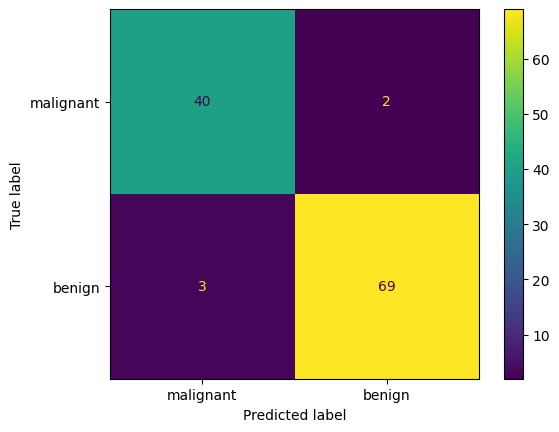

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay.from_estimator(logit_reg, X_test, y_test, 
                                   display_labels=cancer.target_names)